In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil

In [ ]:
%cd ..

/content


In [ ]:
!unzip fakes.zipy

Archive:  fakes.zip
replace image_part_001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: image_part_001.jpg      
 extracting: image_part_002.jpg      
 extracting: image_part_003.jpg      
replace image_part_004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace image_part_004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: image_part_004.jpg      
 extracting: image_part_005.jpg      
 extracting: image_part_006.jpg      
 extracting: image_part_007.jpg      
 extracting: image_part_008.jpg      
 extracting: image_part_009.jpg      
 extracting: image_part_010.jpg      
 extracting: image_part_011.jpg      
 extracting: image_part_012.jpg      
 extracting: image_part_013.jpg      
 extracting: image_part_014.jpg      
 extracting: image_part_015.jpg      
 extracting: image_part_016.jpg      
 extracting: image_part_017.jpg      
 extracting: image_part_018.jpg      
 extracting: image_part_019.jpg      
 extracting: image_part_0

In [ ]:
DATADIR = './fake'
pathNames = DATADIR + '/*.jpg'
images = [cv2.resize(cv2.imread(file), (224, 224)) for file in glob.glob(pathNames)]
paths = [i for i in glob.glob(pathNames)]
images = np.array(np.float32(images).reshape(len(images), -1)/255)

In [ ]:
model = tf.keras.applications.MobileNetV2(include_top=False,weights="imagenet", input_shape=(224, 224, 3))
predictions = model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
%rm -r output/*

In [ ]:
k = 5
kmodel = KMeans(n_clusters = k, n_jobs=-1, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
print(kpredictions)
shutil.rmtree('output')
for i in range(k):
    os.makedirs('output\cluster' + str(i))
for i in range(len(paths)):
    shutil.copy2(paths[i], 'output\cluster'+str(kpredictions[i]))

[3 4 2 2 1 4 1 1 3 2 2 0 3 2 3 2 3 2 0 2 2 0 1 2 3 4 3 3 2 1 4 2 1 2 3 3 4
 1 4 2 0 3 2 3 1 3 3 3 3 1 1 1 0 2 3 1 3 3 0 3 1 1 2 0]


In [ ]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   'euclidean'))
    kl.append(k)

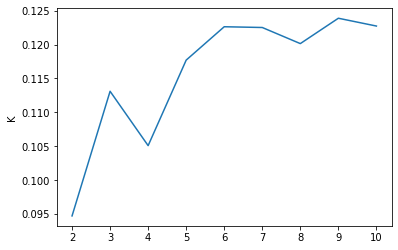

In [ ]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()

In [ ]:
k = 9
kmodel = KMeans(n_clusters = k, n_jobs=-1, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
print(kpredictions)
shutil.rmtree('outputFake')
for i in range(k):
    os.makedirs('fake\cluster' + str(i))
for i in range(len(paths)):
    shutil.copy2(paths[i], 'fake\cluster'+str(kpredictions[i]))

[1 6 8 3 2 6 3 3 1 8 7 4 1 7 5 7 1 7 4 7 8 1 2 7 1 6 1 4 5 2 6 3 3 0 1 1 6
 2 6 7 4 1 3 5 3 1 5 1 1 3 2 2 4 3 1 2 1 1 4 1 3 3 3 4]


In [ ]:
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

In [ ]:
%cd ..

/content


In [ ]:
filename_list = [];
im_list = [];
workingdir = 'fakecluster0';
for file in os.listdir(workingdir):
  print(file)
  img = plt.imread(file)
  im_list.append(np.asarray(img));




image_part_054.jpg


In [ ]:
im_list

[array([[[ 84,  84,  84],
         [192, 192, 192],
         [191, 191, 191],
         ...,
         [189, 189, 189],
         [ 95,  95,  95],
         [ 17,  17,  17]],
 
        [[118, 118, 118],
         [239, 239, 239],
         [245, 245, 245],
         ...,
         [234, 234, 234],
         [126, 126, 126],
         [ 32,  32,  32]],
 
        [[110, 110, 110],
         [241, 241, 241],
         [254, 254, 254],
         ...,
         [243, 243, 243],
         [132, 132, 132],
         [ 32,  32,  32]],
 
        ...,
 
        [[ 92,  92,  92],
         [182, 182, 182],
         [196, 196, 196],
         ...,
         [189, 189, 189],
         [103, 103, 103],
         [ 27,  27,  27]],
 
        [[ 22,  22,  22],
         [ 57,  57,  57],
         [ 52,  52,  52],
         ...,
         [ 56,  56,  56],
         [ 29,  29,  29],
         [  4,   4,   4]],
 
        [[ 46,  46,  46],
         [ 92,  92,  92],
         [103, 103, 103],
         ...,
         [ 97,  97,  97],
  

In [ ]:
len(im_list)

1

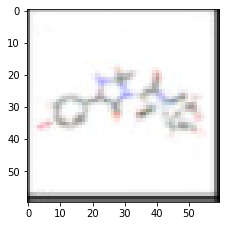

In [ ]:
#credits to https://stackoverflow.com/questions/19471814/display-multiple-images-in-one-ipython-notebook-cell
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('fakecluster0/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

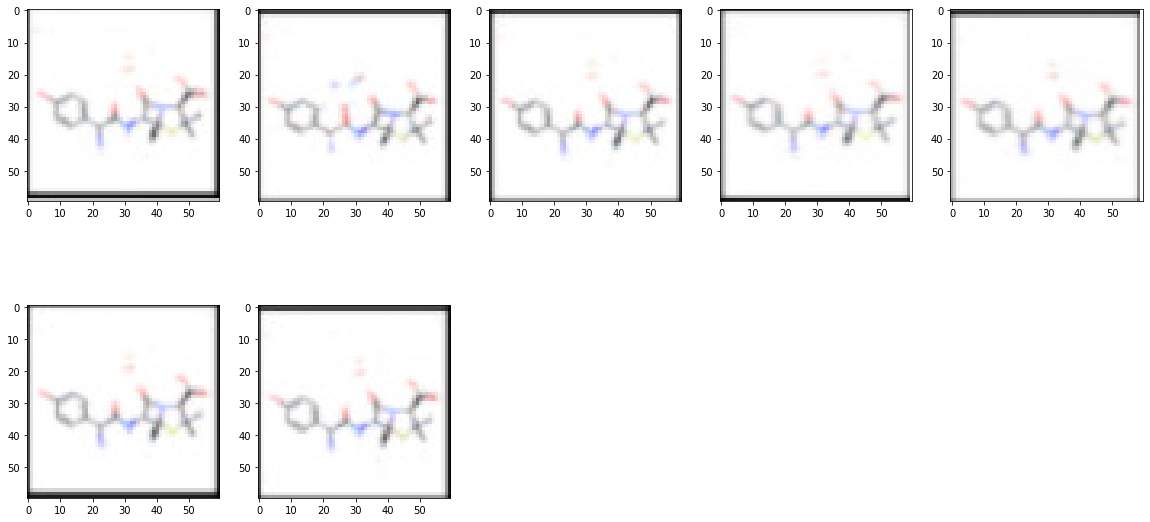

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('fake\cluster2/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

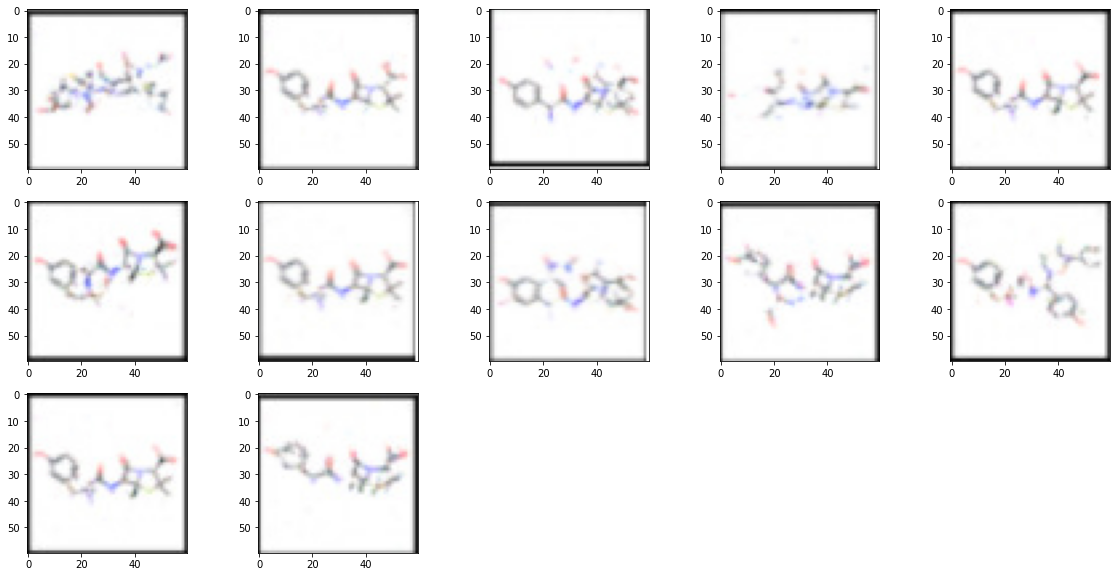

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('fake\cluster3/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

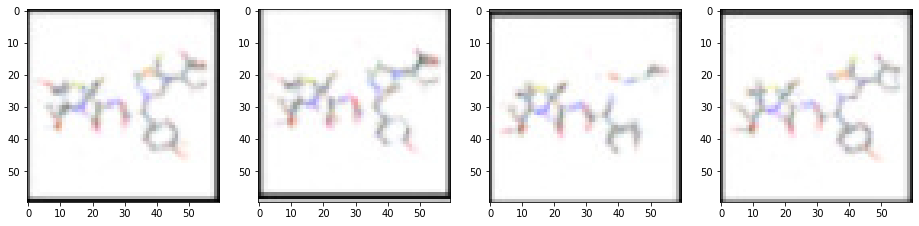

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('fake\cluster5/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

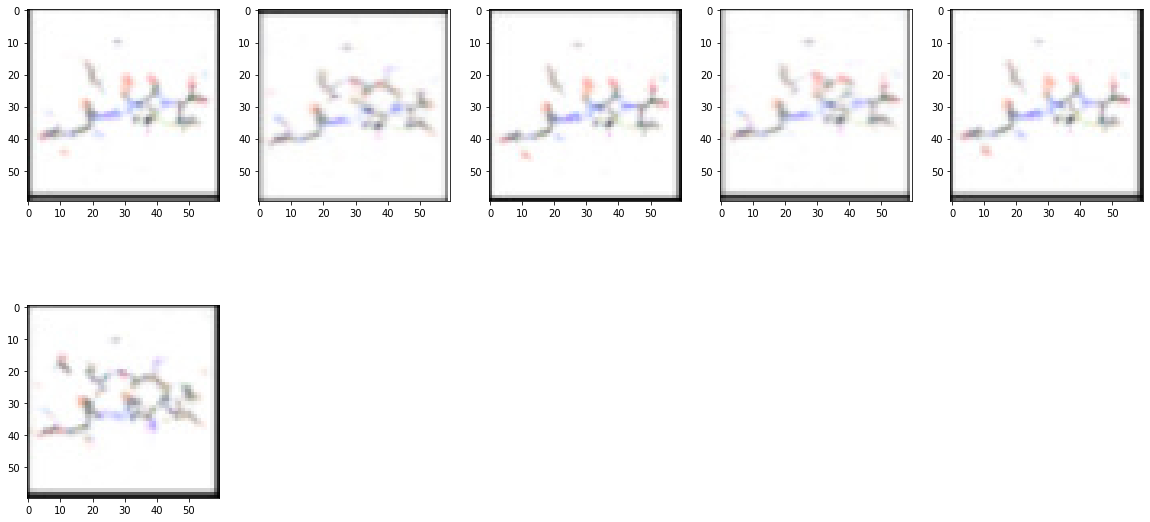

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('fake\cluster6/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

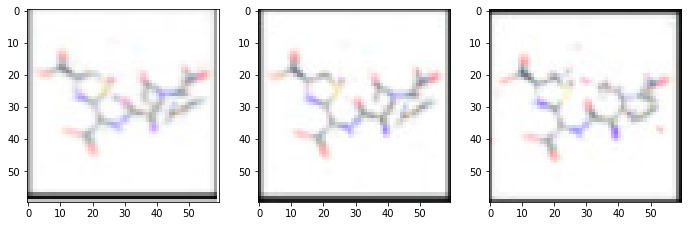

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('fake\cluster8/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

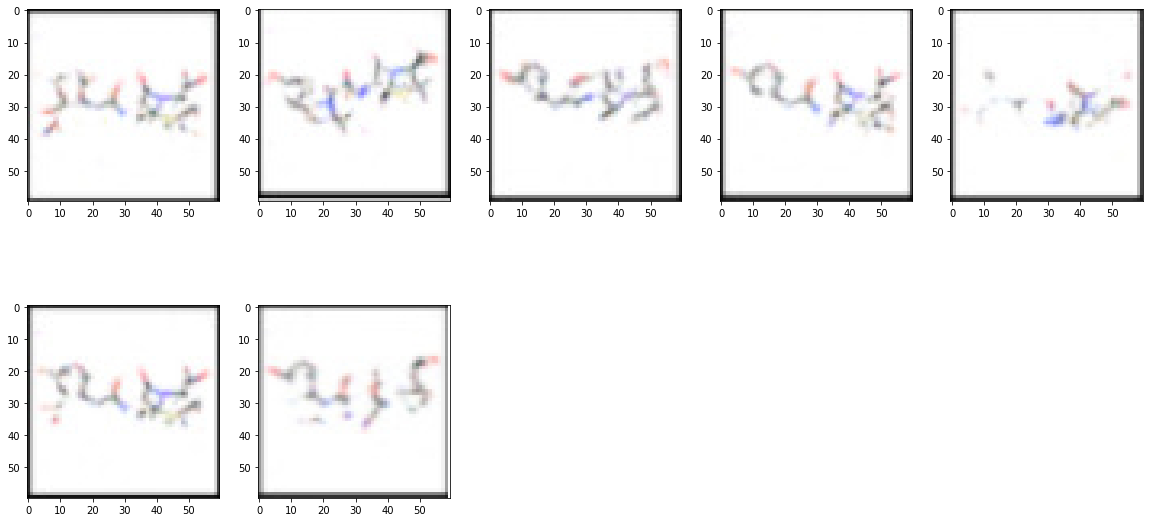

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('fake\cluster7/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

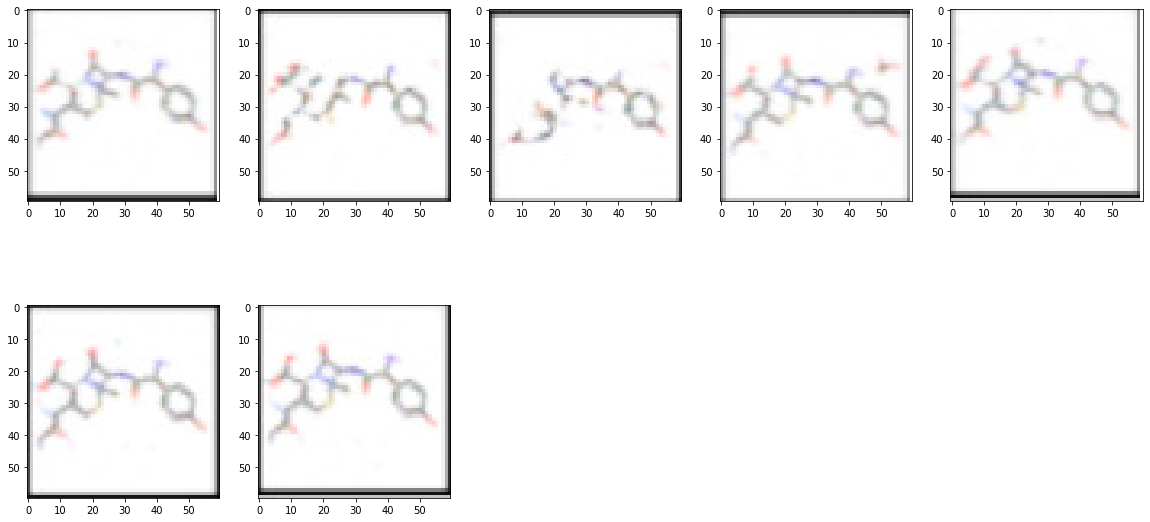

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('fakecluster4/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)